# Аналіз зібраних даних

## Мета аналізу

- Провалідувати якість даних.
- Ознайомитись з даними та виявити їх особлиовсті.
- З'ясувати чи можливо виділити категорії сентиментів з відгуків, використовуючи рейтинг вказаний користвуачем.


## Питання
- Cкільки відгуків українскьою вийшло зібрати?
- Яке розподілення відгуків за рейтингом?
- Чи є коментарі з рейтингом «5» позитивно забарвленими?
- Чи є коментарі з рейтингом «4» позитивно забарвленими?
- Чи є коментарі з рейтингом «3» нейтральними?
- Чи є коментарі з рейтингом «2» негативно забарвленими?
- Чи є коментарі з рейтингом «1» негативно забарвленими?
- Які є начастотніші ознаки у кожному рейтингу?
- Які є домені особливості у даних?

## Розетка надає змогу залишити відгук користувачам наступним чином
![rating](pic.jpeg)

In [10]:
from langdetect import detect
import json
import re

def lang(text):
    try:
        return 'uk' if detect(text) == 'uk' else 'other'
    except:
        return 'other'
    
def has_text(comment):
    return comment['text'] or comment['advantages'] or comment['shortcomings']

def concat_text(comment):
    text = ''
    
    if comment['advantages']:
        text += comment['advantages']
        
        if comment['shortcomings']:
            text += '.'
        
    if comment['shortcomings']:
        text += comment['shortcomings']
    
    return text

def load_data(f):
    data = []
    with open(f, 'r') as rows:
        for row in rows:
            comment = json.loads(row)
            if has_text(comment):
                text = concat_text(comment)
                comment['lang'] = lang(text)
                data.append(comment)

    return data

In [11]:
comments = load_data('comments.json')

## Загальний аналіз

In [99]:
import pandas as pd
import numpy as np

In [13]:
df = pd.DataFrame(comments)

In [14]:
df.count()

id                      24517
name                    24517
rate                    21270
text                    24517
advantages              24517
shortcomings            24517
positive_votes_count    24517
negative_votes_count    24517
lang                    24517
dtype: int64

other    21925
uk        2592
Name: lang, dtype: int64


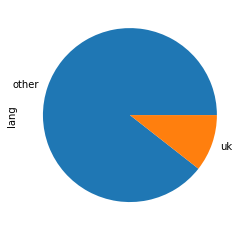

In [15]:
counts = df['lang'].value_counts()
counts.plot(kind='pie')
print(counts)

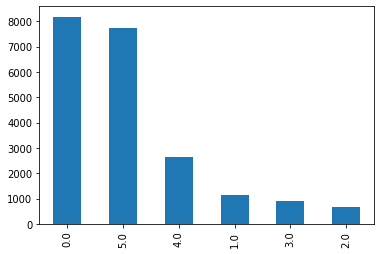

In [16]:
df['rate'].value_counts().plot(kind='bar')

In [17]:
df.head()

,id,name,rate,text,advantages,shortcomings,positive_votes_count,negative_votes_count,lang
0,45961962,Алексей Поповиченко,NaN,"Повесил , подключил— работает. Предыдущий тако...",,,1,0,other
1,45939257,Олена Підіпригора,5.0,Хороший бойлер,Цена,,2,0,other
2,45936390,Андрій Іваночко,5.0,Хороший бойлер. Працює дуже тихо. Воду гріє шв...,,,1,0,other
3,45908030,Світлана Вегера,4.0,Доставлино дуже швидко.Все прийшло в цілому і ...,,,0,1,other
4,45903077,Анна Амиралиева,5.0,"Пока работает, нареканий нет.",,,1,0,other


In [18]:
df.tail()

,id,name,rate,text,advantages,shortcomings,positive_votes_count,negative_votes_count,lang
24512,45687941,Дарья Донцова,5.0,Отличный вариант для увлажнения воздуха на раб...,1. Хорошо увлажняет воздух на рабочем месте. 2...,Пока не обнаружены.,0,0,other
24513,44989296,Ирина,5.0,"Прекрасный мини-увлажнитель,очень экономно рас...",,,1,0,other
24514,44779294,Тетяна Федун,2.0,Пройшов тиждень і зволожувач перестав працюват...,Красивий,Забивається!!!,0,0,uk
24515,44707415,Юля Юля,5.0,Работал всю ночь в интервальном режиме - испол...,"Оооочень милый, удобный, маленький. Прорезинен...",При первом включении был немного неприятных за...,2,0,other
24516,44055493,Ніна\tЖук,0.0,"Все якісне, все працює. Повітр""я дійсно зволож...",,,0,0,other


In [63]:
uk_df = df[(df['lang'] == 'uk') & df['rate']]

In [64]:
uk_df['rate'] = uk_df['rate'].astype('int')
uk_df['rate'].describe()

<ipython-input-64-cfe859f9dc25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_df['rate'] = uk_df['rate'].astype('int')


count    1940.000000
mean        4.179897
std         1.213687
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rate, dtype: float64

In [98]:
uk_df['rate'].value_counts()

5    1116
4     437
3     145
1     138
2     104
Name: rate, dtype: int64

In [97]:
uk_df.groupby('rate')['text'].apply(lambda x: np.mean(x.str.len())).reset_index(name='mean_len_text')

,rate,mean_len_text
0,1,259.376812
1,2,242.692308
2,3,257.317241
3,4,224.906178
4,5,174.870072


In [66]:
def print_comment(comment):
    tags = ['😡', '😔', '🙂', '😋', '🥰']
    print('- ' + str(tags[int(comment['rate'] - 1)]) + ' ' + comment['text'])

for i, comment in uk_df[:20].iterrows():
    print_comment(comment)

- 🙂 Все нормально, але одразу після закінчення гарантійного терміну - потік бак... <br />
3 роки та 2 міс до цього працювало все норм.
- 🥰 покупкою задоволений
- 😋 Працює вже більше року, нарікань не має. При тому, що вода дуже жорстка і велика кількість накипи.
- 🥰 Прийшов без пошкоджень. Воду гріє. Доставка швидко, на наступний день. Упакавани на совість чюдово.
- 😔 
- 😋 при покупці купив PREMIUM доставку виписав недавно технічні світильники з поміткою преміум а за доставку нарахувало 55 грн в коментах до заказу писав -ніхто не відгукнувся мабуть обман
- 🥰 Я дуже задоволений. Бойлер вже більше ніж півроку служить. Поки що все дуже добре. Купував, прочитавши відгуки, не шкодую.
- 🥰 Поки новий,недоліків не знайшов.Далі буде видно.
- 🥰 Товаром задоволені. 4 місяці працює. 2 години і вода нагріта з нуля. Тримаємо завжди включеним, електроенергії споживає мало.
- 🥰 Відправили без вентилятора.
- 🥰 Получил  бойлер без подарка. Вентилятора не было!
- 🥰 Чудорвий бойлер, заказав і батькам таки

## Спостереження

- Відугіків українською вийшло лише близько 10%
- розподілення по оцінкам не сбалансоване, домінує оцінка «5»
- відгуки містить html теги `<br />`
- відгуки містять одруківки
- позитивні коментарі містять такі слова: дуже задоволені, класний, рекомендую, простий, надійний

In [67]:
def clean_text(txt):
    return re.sub('<br />', ' ', txt)

uk_df['text'] = uk_df['text'].apply(clean_text)

<ipython-input-67-9b3d729521b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_df['text'] = uk_df['text'].apply(clean_text)


## Аналіз інформації в блоках переваг та недоліків

In [68]:
uk_df[(uk_df['advantages'] != None) | (uk_df['shortcomings'] != None)]
data = uk_df.sample(n = 20)[['advantages','shortcomings']]

for i, comment in data[:20].iterrows():
    print('- ' + '👍 ' + comment['advantages'] + ' | ' + '👎 ' + comment['shortcomings'])

- 👍 Виконує свої функції.Хороший зволожувач. | 👎 Немає
- 👍 Лише як додатковий підігрів | 👎 За надто слабкий, щоб бути основним підігрівом
- 👍 Дизайн, якість | 👎 Нема
- 👍 ціна=якість | 👎 не виявив
- 👍 Гріє добре | 👎 Немає
- 👍 Нормально охолоджує | 👎 
- 👍 простий у використання, зрозуміла сенсорна панель та пульт, великий об'єм на довго вистачає | 👎 потрібно зливати воду коли довго не користуюся
- 👍 За таку ціну просто фантастичний конвектор. | 👎 Не виявила.
- 👍 гріє | 👎 пока не побачили
- 👍 Невелика ціна, працює та гріє добре | 👎 прийшов з оббитою краскою подертий
- 👍 Нескладний в установці,воду гріє добре,на вигляд непогано | 👎 Поки немає
- 👍 Якість, ціна | 👎 Немає
- 👍 Поки нема опалення зі своїми обов'язками справляється гарно | 👎 Мабуть чекав забагато від нього, ніколи не було масляного обігрівача. При першому використані пройшло годин 5, перш ніж в кімнаті стало тепло, хоча працював на повну. І електрику їсть гарно :(
- 👍 Працює. Гріє. Ціна. | 👎 -
- 👍 Ціна, потужність | 👎 Впринципі 

## Спостереження

- Переваги та недоліки містять здебільшого факти, та не виражать ставлення авторів.
- Є складнощі з тим щоб використати ці дані. Справедливо можливо припустити, що переваги видають позитивне ставлення, а недоліки — негативне. Але як враховувати ситуацію, коли є і переваги і недоліки одночасно? Так кол
- Також постає питання, що саме потрібно визначити: ставлення покупця до товару? емоцію коментаря? емоцію автора коментаря? Факти про товар? Заламався / проправцював?  Наприклад «тен згорів на 2 день» не містить жодного сентимента, але знаючи контекст, що тен не повинні горіти на 2 день, можливо припустити, що автор виражає негативне ставлення у своєму коментарі.
- Також не зрозуміло як влючити цю інформацюі в текст коментаря, щоб модель розпізнало переваги, як переваги та недоліки, як недоліки.

In [87]:
from sklearn.feature_extraction.text import CountVectorizer

def show_comments_by_rate(rate = 1, n = 20):
    data = uk_df[(uk_df['rate'] == rate) & uk_df['text']].sample(n = n)
    for i, comment in data[:20].iterrows():
        print('💭 ' + comment['text'])
        
def show_top_words(rate = 1, n = 20):
    data = uk_df[uk_df['rate'] == rate]
    vec = CountVectorizer()
    transformed_data = vec.fit_transform(data['text'])

    sum_words = transformed_data.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    print(words_freq[:n])
    
def show_top_bigrams(rate = 1, n = 20):
    data = uk_df[uk_df['rate'] == rate]
    vec = CountVectorizer(ngram_range=(2, 2))
    transformed_data = vec.fit_transform(data['text'])

    sum_words = transformed_data.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    print(words_freq[:n])

## Аналіз комментарів з рейтингом 1

In [70]:
show_top_words(1)

[('не', 213), ('на', 133), ('що', 75), ('як', 38), ('через', 38), ('але', 37), ('за', 34), ('це', 34), ('по', 30), ('так', 27), ('він', 25), ('та', 24), ('після', 23), ('при', 22), ('для', 22), ('працює', 22), ('бойлер', 22), ('його', 22), ('тому', 20), ('товар', 19)]


In [71]:
show_top_bigrams(1)

[('не рекомендую', 17), ('не працює', 13), ('не раджу', 10), ('так як', 9), ('тому що', 9), ('він не', 8), ('це не', 6), ('нікому не', 5), ('нічого не', 5), ('не гріє', 5), ('не знаю', 5), ('через місяць', 5), ('те що', 4), ('що робити', 4), ('під час', 4), ('гарантійний талон', 4), ('сказав що', 4), ('сервісний центр', 4), ('перестав працювати', 4), ('але через', 4)]


In [91]:
show_comments_by_rate(1)

💭 Здохла за сезон
💭 Сьогодні отримала конвектор, включила, запрацював зразу, виділяючи неприємний запах. Попрацював 1хв. Виключила.  Знову включила -  не працює. Кілька разів включала -не працює. Що робити? Дуже надіялась, але розчарована.
💭 Через 4 місяці нормальної роботи почав вибивати світло
💭 конструкція виконана таким чином, що мені страшно залишати його вдома з наповненим 5 літровим баком - тому що в любий момент він може потікти 
Заливка відбувається з потребою у перевиртання бачка - це все дуже не зручно 
Не рекомендую, краще взяти менше обємом і більш якісний
💭 Грів добре,був трішки запах палі при нагріванні
💭 За тиждень часу почав сильно протікати. 
Калюжі, нерви і абсолютне розчарування. 
По гарантії не збирався звертатись, товар дешевий, не маю часу на такі справи. Викинув у смітник.
💭 В комплекті немає ніжок для підлогового розміщення, хоча в описі товару вказано 2 комплекти кріплень та можливість підлогового розміщення, та, оскільки в продажі окремо ніжок до нього нема, 

### Спостереження щодо комментарів з рейтингом 1
- Користувачі висловлють негативне ставлення через пряме висловленні незадоволення «не задоволена», «не раджу» і т.д.
- Деякі користувачі повідомляють лише факти, та не дають ніякої оцінки стосовно свого ставлення щодо фактів. Наприклад: "Пройшло півтора роки, згорів тен.", "Умер в 1й день". Тільки за допомогую контексту, що техніка не повина ламатися у перший день і взгалі люди засмучуються коли щось ламається, можливо зрозуміти, що це негативний коментар. 
- Інші ознаки: слова у верхньому регістрі, декілька знаків оклику підряд, комбінація знаків оклику та питань.

In [73]:
show_top_words(2)

[('не', 154), ('на', 96), ('що', 54), ('але', 33), ('це', 28), ('до', 26), ('як', 25), ('за', 25), ('після', 24), ('при', 22), ('по', 20), ('так', 20), ('все', 19), ('він', 19), ('працює', 19), ('чи', 18), ('було', 16), ('бойлер', 15), ('для', 15), ('зволожувач', 15)]


In [74]:
show_top_bigrams(2)

[('не рекомендую', 8), ('він не', 6), ('те що', 5), ('це не', 5), ('так що', 5), ('що на', 5), ('не працює', 5), ('гарячу воду', 4), ('гарантійний випадок', 4), ('цей зволожувач', 4), ('що не', 4), ('одним словом', 4), ('але це', 4), ('не було', 4), ('гарантійний талон', 4), ('можна було', 3), ('не гарантійний', 3), ('він працює', 3), ('того щоб', 3), ('не вмикається', 3)]


In [75]:
show_comments_by_rate(2)

💭 Замовлення було оформлене й оплачене 24.03 , товар до сих пір не отримала( не розумію хто кинув продавець чи НП і там і там тиша... 
Надіюсь хоч тут мене почують і дадуть відповідь. Не хочу ображати магазин, можливо така ситуація виникла в зв’язку з карантином.
💭 Такий бойлер прослужив у мене 5 років і потік після завершення гарантії. Купляла не на "Розетці". Чистила бойлер щороку. Не рекомендую.
💭 Попрацював годину і не працює. Світить червоним кнопка, а не зволожує((
💭 Конвектор хороший, але почуття обману не помякшує і подарунок. 
 Цікаво у всіх конвектор в коробці вверх ногами?   
Хочу додати ще  гаратійні талони які були в комплекті. 
1.Гарантійний талон Російської Федерації. є однією з сторінок  інструкції. Там вказана фізична адреса і телефон офіційного представника виробника. 
2.Гарантійний талон з логотипами Noirot на українській мові повністю незаповнений. 
3.Гарантійний талон від магазину Розетка де мені вказали термін гарантії 0 місяців. Фізичні адреси сервіс центрів таєм

## Спостереження щодо комментарів з рейтингом 2
- Збігаються із попередніми спостереженнями щодо рейтингу 1

## Аналіз коментарів з рейтингом 3

In [76]:
show_top_words(3)

[('не', 166), ('на', 152), ('що', 59), ('але', 56), ('до', 47), ('як', 45), ('за', 44), ('це', 40), ('води', 33), ('при', 32), ('для', 30), ('працює', 28), ('дуже', 27), ('від', 26), ('так', 26), ('та', 25), ('все', 24), ('то', 24), ('воду', 23), ('по', 23)]


In [77]:
show_top_bigrams(3)

[('не дуже', 8), ('до цього', 6), ('як на', 6), ('будь ласка', 6), ('не знаю', 6), ('не було', 6), ('ще не', 5), ('так як', 5), ('тому що', 5), ('нормально але', 4), ('вийшов ладу', 4), ('отвір для', 4), ('дуже добре', 4), ('чи це', 3), ('за такі', 3), ('такі гроші', 3), ('гарячої води', 3), ('те що', 3), ('захист від', 3), ('ньому немає', 3)]


In [78]:
show_comments_by_rate(3)

💭 Бойлер на трійку, не вище - не дуже надійний.
💭 Не в перший раз розетка пише про товар те чого немає насправді, ошукуючи таким чином покупців. 
Обирав між декількома кондиціонерами і вибрав саме цей через ці дві функції, яких, як виявилося, в ньому немає. 
Сам кондиціонер нормальний. Працює. Але....
💭 Як зняти кришку для доступу до баків? Там два шурупа викручуються. Але кришка не знімається...
💭 Постійно булькає, заважає спати. Підтримка каже везіть все до сервісу с чеками гарантіями паспортом та саму річ яка досить важка. По телефону не допомогають.
💭 Купили кілька місяців назад....я незнаю чому так,  у нас в кімнаті  стоїть невеличкий туман і чомусь важко дихати - хочеться кашляти (включаємо в основному вночі, воду фільтруємо через фільтр - кувшин "Бар єр")
💭 Через два приблизно місяці полетів гігрометр. Завис і більше 32 не показує. Також мені здалося, що зволожує не так інтенсивно, як було спочатку. Навіть на максимумі пари інтенсивної немає. Розчарована, на жаль.
💭 Бойлер пропр

## Спостереження щодо комментарів з рейтингом 3
- Я очікував тут побичити більшість нейтральних комментарів, але побичив близько половини негавних, частку позитивніх і досить мало нейтральних комментарів.
- також з'явилися коментарі з негативним забарвленням виду: «все наче ок, але (і багато поганого)»
- нейтральні коментарі містять такі слова: справляється, працює, добре

## Спостереження щодо комментарів з рейтингом 4

In [79]:
show_top_words(4)

[('не', 394), ('на', 357), ('що', 180), ('за', 135), ('але', 134), ('для', 118), ('до', 106), ('працює', 100), ('як', 94), ('при', 75), ('це', 73), ('та', 73), ('дуже', 71), ('все', 66), ('добре', 61), ('води', 55), ('так', 55), ('якщо', 53), ('його', 52), ('він', 51)]


In [80]:
show_top_bigrams(4)

[('так як', 18), ('поки що', 15), ('він не', 13), ('за таку', 12), ('те що', 12), ('не дуже', 12), ('таку ціну', 11), ('не було', 11), ('працює добре', 11), ('працює тихо', 10), ('не має', 9), ('тому що', 9), ('свою ціну', 9), ('ціна якість', 8), ('але це', 8), ('за свою', 8), ('на стіну', 8), ('що він', 8), ('на ніч', 8), ('це не', 8)]


In [81]:
show_comments_by_rate(4)

💭 Замовляв не тут. Після 3-х місяців користування даний бойлер потік. Виявився заводський дефект. Після звернення до сервісного центру виробника - даний бойлер був замінений на новий, повністю за їхній рахунок. Новий бойлер вже працює 4 місяці - ніяких нарікань немає. Рекомендую як бюджетний та простий у користування бойлер.
💭 Хороший зволожувач, зручно наповнювати, є ручка для переноски і під час наповнення можна його поставити, а не тримати в руках. Недостатньо потужний, щоб підтримувати вологу в кімнаті майже постійно працює. Вбудований гігрометр працює правильно.Загалом задоволені товаром.
💭 Датчик реагує але незрозумло як, вологість зросла від 31 до 42 а вікна повністю в конденсаті. Все інше добре.
💭 Замовляв бойлер уже давно перевіреної фірми. Обробили замовлення швидко, доставили також швидко. Воду нагріває достатньо швидко і тримає температуру довго. З мінусів це немає постійної можливості регулювати температуру води.НУ але з цим можна миритись. На даний момент все задовільняє.

## Спостереження
- Відгуки здебільшого нейтральні, або стримано позитивні.
- нейтральні коментарі містять: норм, звичайний, нарікань немає, загалом, все нормально

## Аналіз комментарів з рейтингом 5

In [82]:
show_top_words(5)

[('на', 615), ('не', 605), ('що', 334), ('дуже', 298), ('за', 278), ('працює', 238), ('для', 206), ('все', 185), ('як', 177), ('але', 166), ('та', 158), ('це', 146), ('швидко', 145), ('до', 134), ('бойлер', 124), ('добре', 121), ('повітря', 118), ('зволожувач', 108), ('при', 106), ('води', 99)]


In [83]:
show_top_bigrams(5)

[('поки що', 31), ('швидко нагріває', 30), ('все працює', 29), ('те що', 29), ('дуже задоволений', 23), ('не було', 21), ('досить швидко', 20), ('так як', 19), ('дуже швидко', 18), ('як на', 18), ('без проблем', 17), ('свою ціну', 17), ('працює добре', 17), ('дуже зручно', 17), ('під час', 17), ('ціна якість', 17), ('гріє добре', 16), ('свої гроші', 16), ('за таку', 16), ('це не', 16)]


In [84]:
show_comments_by_rate(5)

💭 Купував не тут. Користувався один сезон. Наприкінці сезона обігрівав дві кімнати в якості основного елемента обігріву. В кімнатах було 20-22 градуси. Періодично навіть вимикав один тен. В сильні морози в якості основного виду опалення не тестувався. При невеликих морозах в кімнаті температура цілком комфортна.
💭 Чудовий зволожувач повітря, купив після народження дитини, клімат тепер в кімнаті просто чудовий, рекомендую тим, хто хоче мати чисте повітря з ідеальним рівнем вологості#PHILIPS;
💭 Користуюсь вже біля року. Все працює як годинник.
💭 Купував в жовтні 2016-го року - поки-що я дуже задоволений, реально якісний бойлер. Рекомендую!
💭 Это очень удобно, можно запрограммировать работу электрического прибора в удобное для Вас время.  Это значительно сэкономите расход электроэнергии, а соответственно и Ваш бюджет. Аппарат нагревает не воздух, а окружающие предметы, благодаря чему даже после выключения самого прибора нагретые предметы способны отдавать тепло. Кроме того, хотелось бы от

## Спостереження
- Позитивні відгуки мітстять такі слова: дуже, супер, рекомендую, задоволений, відмінно і т.д.
- Позитивні відгуки містять здебільшого інформацію про якість товару та власне ставлення користувача.

## Висновки
- Розподілення в даних не сбалансовано. Левова частка відгуків з оцінкою «5». 
- Є складнощі з тим, щоб визначити ознаки категорії «позитивний», «негативний» та «нейтральний»
- Відгуки з оцінкою 1-2 переважно виражають або негативне ставлення до товару/компанії, або констатують факт несправності/поламки
- Відгуки з оцінкою 3 здебільшого суперечливі: відгуки з цією оцінкою можна віднести до усіх категорій. Але здається, що у більшості відгуків переважає негативний сентимент.
- Оцінка 4 позначає як нейтральний, так і стриманий позитивний сентимент
- Відгуки з оцінкою 5 містять переважно позитивний сентимент
- Негативні відгуки в середньому більш довгі ніж позитивні
- Нетральні відгуки досить короткі, не мість прикментників вищого та найвищого ступенів порівнянь
- Домена особливість — згадка про факт поламки / несправності можна тракутвати як негативне ставлення користувача

In [102]:
with open('analyzed_comments.json', 'w') as json_file:
    json_file.write(uk_df.to_json())